<a href="https://colab.research.google.com/github/AmonTonui/Final_Year_Project/blob/main/OutliersInDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outliers in column 'Aged 15 years and under' : 8
Outliers in column 'Aged 16 to 24 years' : 44
Outliers in column 'Aged 25 to 34 years' : 34
Outliers in column 'Aged 35 to 49 years' : 6
Outliers in column 'Aged 50 to 64 years' : 9
Outliers in column 'Aged 65 years and over' : 2
Total number of outliers(IQR): 103


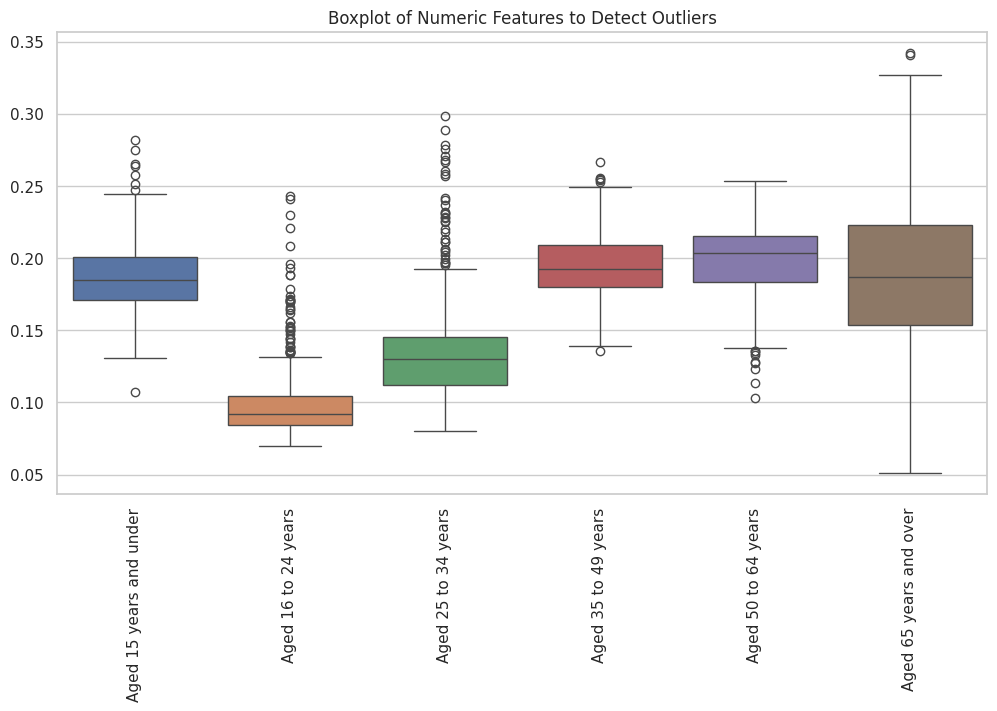

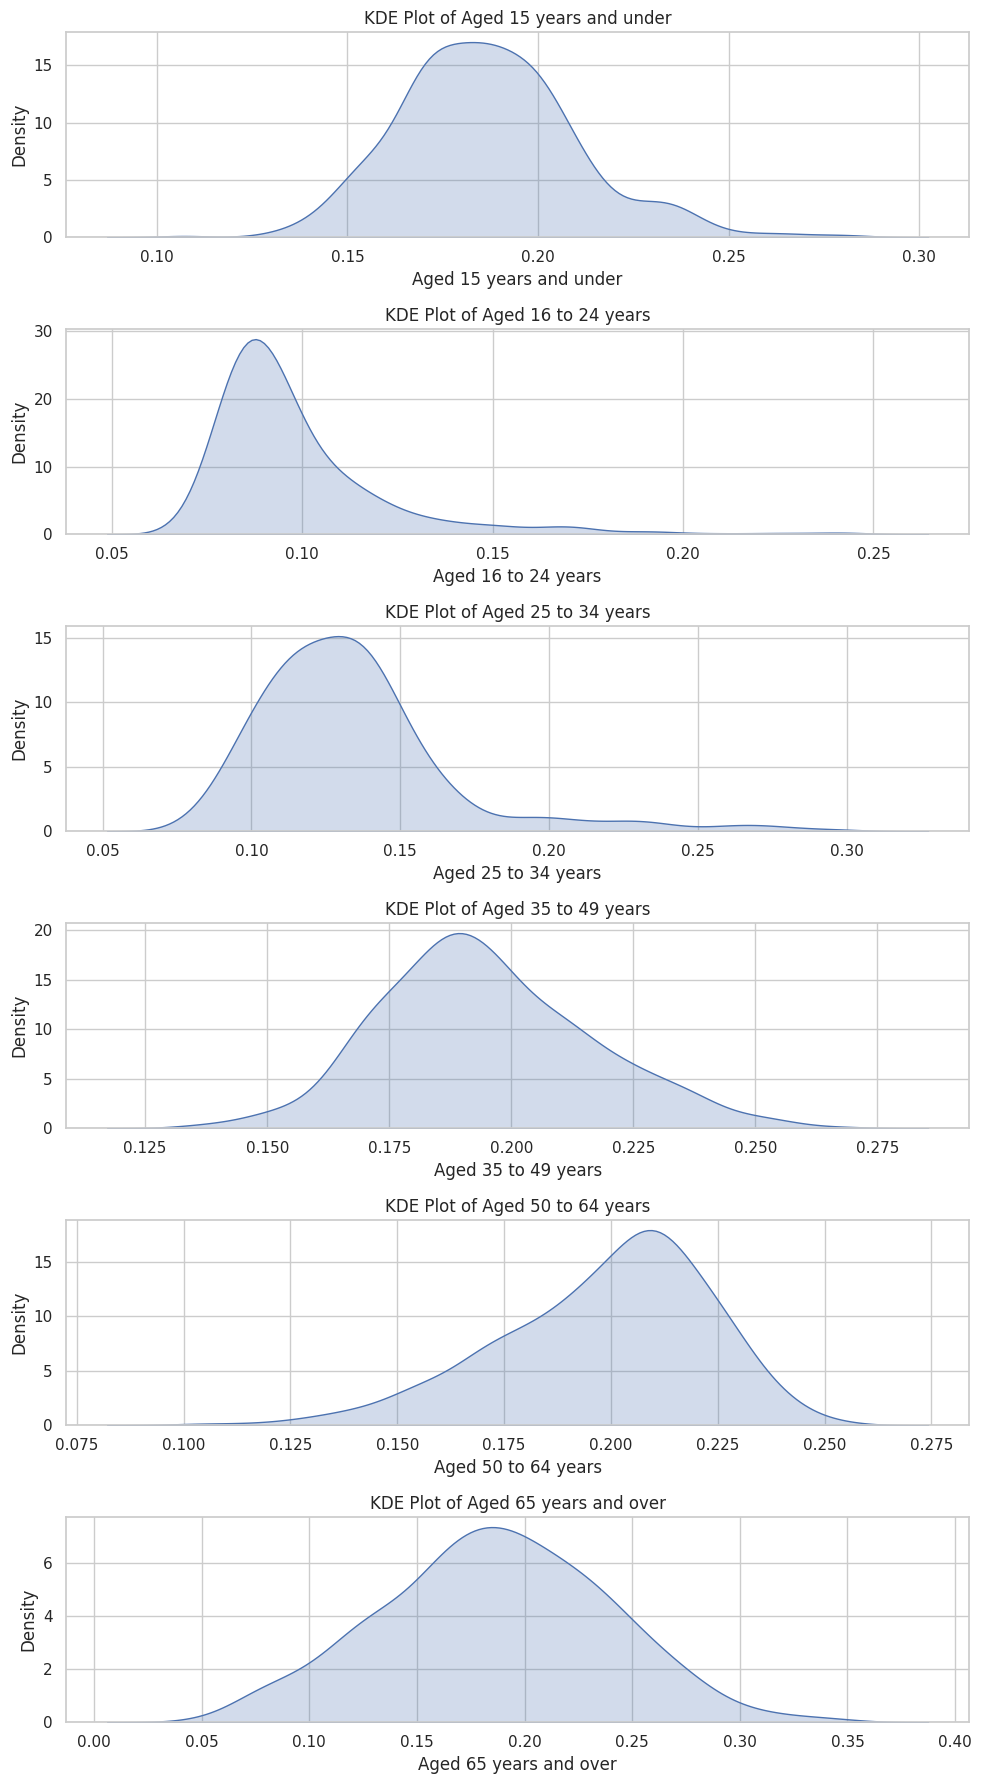

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

education_data = pd.read_csv("Agenormalized_with_winners_cleaned.csv")
labeling_columns = ['Westminster Parliamentary constituencies', 'Winning Party', 'Winning Vote Share']
education_data = education_data.drop(columns=labeling_columns)
num_cols = education_data.select_dtypes(include=[np.number]).columns

# Display outlier counts per column IQR
def count_outliers(data, column):

    Q1 = data[column].quantile(0.25)#lowerbound
    Q3 = data[column].quantile(0.75)#upperbound
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

outlier_counts = {}
for col in num_cols:
    outlier_counts[col] = count_outliers(education_data, col)
    print(f"Outliers in column '{col}' : {outlier_counts[col]}")

total_outliers = sum(outlier_counts.values())
print(f"Total number of outliers(IQR): {total_outliers}")

# Creates boxplots to visualize outliers
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=education_data.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features to Detect Outliers")
plt.show()

# Create KDE plots for each numeric column
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    sns.kdeplot(education_data[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col}")

plt.tight_layout()
plt.show()